<a href="https://colab.research.google.com/github/Nihal-18/ML/blob/master/Exp_4_J058_250720_%26_310720.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
 

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2
 )
 
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59


In [ ]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)

df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Continent-Region','DevName':'Development-status'},inplace=True)

df_can.set_index('Country',inplace=True)

df_can['Total'] = df_can.sum(axis=1)

years = range(1980,2014)

df_can.head()

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [ ]:
df_can.head()

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [ ]:
# import library
import matplotlib.pyplot as plt
import matplotlib as mpl

### PIE CHARTS

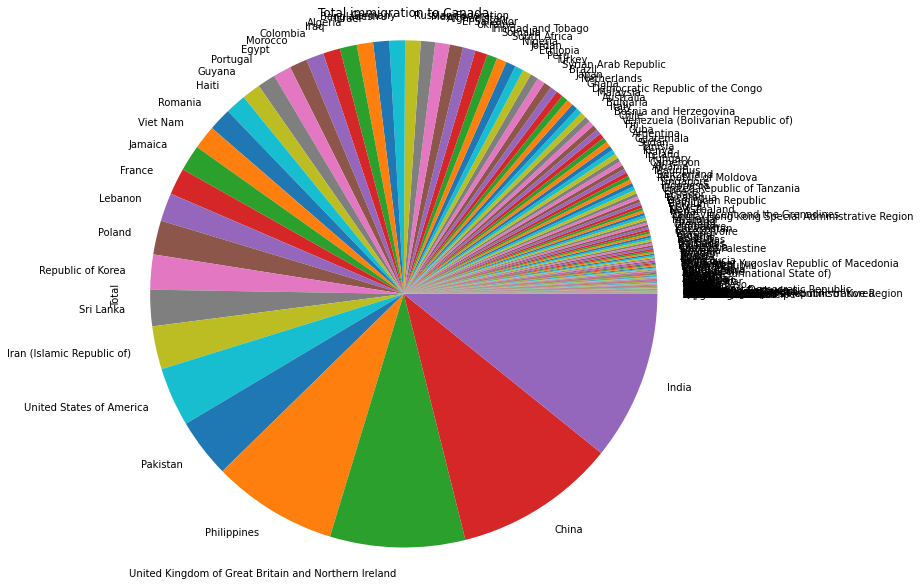

In [ ]:
df_can['Total'].plot(
    kind='pie',
    figsize=(10,10)
)

plt.title('Total immigration to Canada')
plt.axis('equal') #pie chart as circle given by thr axis parameter
plt.show()

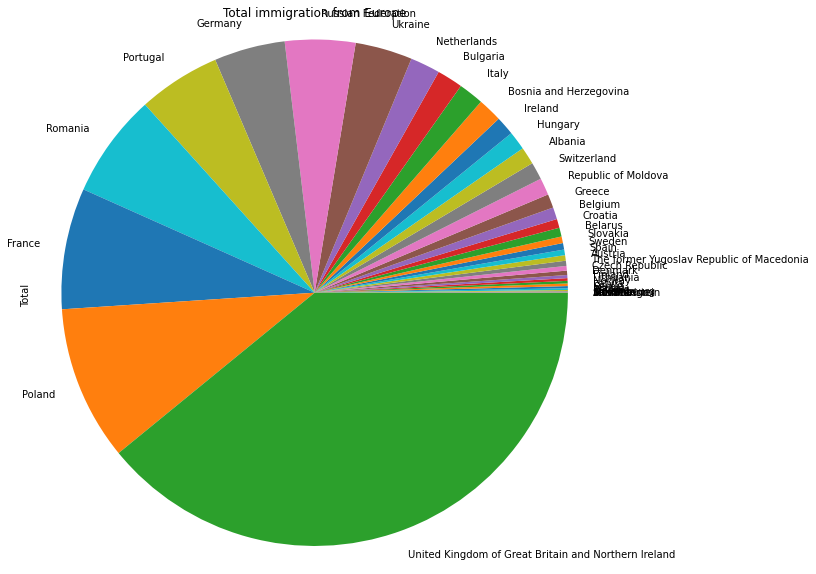

In [ ]:
#Total immigration from Europe only 
# so the below condition us given

condition = df_can['Continent'] == 'Europe'

dfnew = df_can[(condition)]

dfnew['Total'].plot(
    kind='pie',
    figsize=(10,10)
)

plt.title('Total immigration from Europe')
plt.axis('equal') #pie chart as circle given by thr axis parameter
plt.show()

In [ ]:
dfnew1 = df_can.groupby('Continent',axis=0).sum() # here grouping is done along the rows by merging them


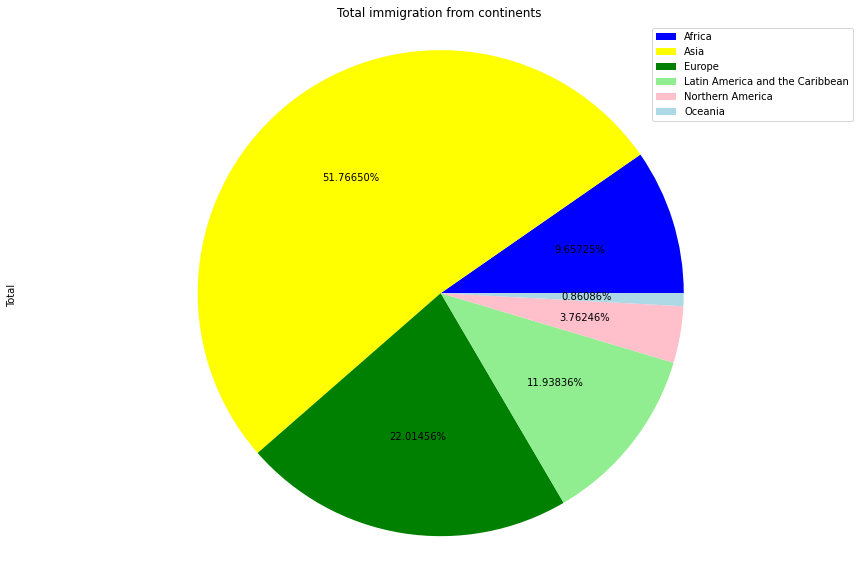

In [ ]:
dfnew1.head()

colors=['blue','yellow','green','lightgreen','pink','lightblue']


dfnew1['Total'].plot(
    kind='pie',
    figsize=(15,10),
    autopct='%1.5f%%', # for displaying the percentages
    colors=colors,
    labels=None
)

plt.title('Total immigration from continents')
plt.axis('equal') #pie chart as circle given by thr axis parameter
plt.legend(labels=dfnew1.index,loc='upper right')
plt.show()

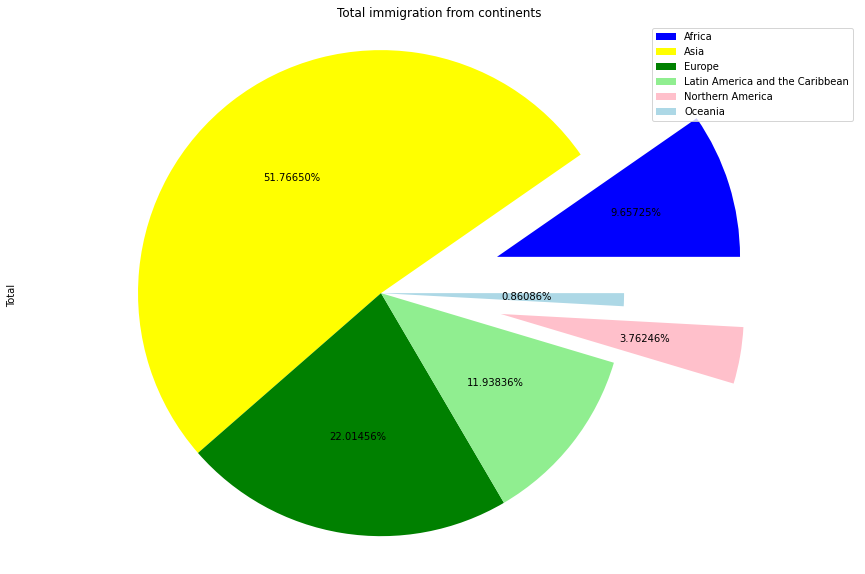

In [ ]:
dfnew1.head()

colors=['blue','yellow','green','lightgreen','pink','lightblue']
explodelist = [0.5,0,0,0,0.5,0]
# explode list is used to highlight particular segments of the pie chart

dfnew1['Total'].plot(
    kind='pie',
    figsize=(15,10),
    autopct='%1.5f%%', # for displaying the percentages
    colors=colors,
    labels=None,
    explode=explodelist
)

plt.title('Total immigration from continents')
plt.axis('equal') #pie chart as circle given by thr axis parameter
plt.legend(labels=dfnew1.index,loc='upper right')
plt.show()

### BOX PLOT

In [ ]:
# Box Plot
# min - first quartile - median - third quartile - max(outlier)
# inter quartile range - third quartile - first quartile
# describe

In [ ]:
df_india = df_can.loc['India',years].transpose()

df_india.head()

1980    8880
1981    8670
1982    8147
1983    7338
1984    5704
Name: India, dtype: object

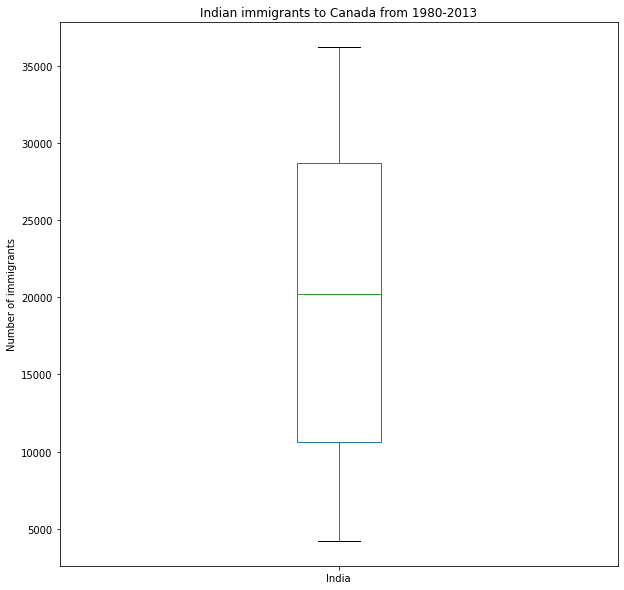

In [ ]:
df_india.plot(
    kind='box',
    figsize=(10,10)
)

plt.title('Indian immigrants to Canada from 1980-2013')
plt.ylabel('Number of immigrants')
plt.show()

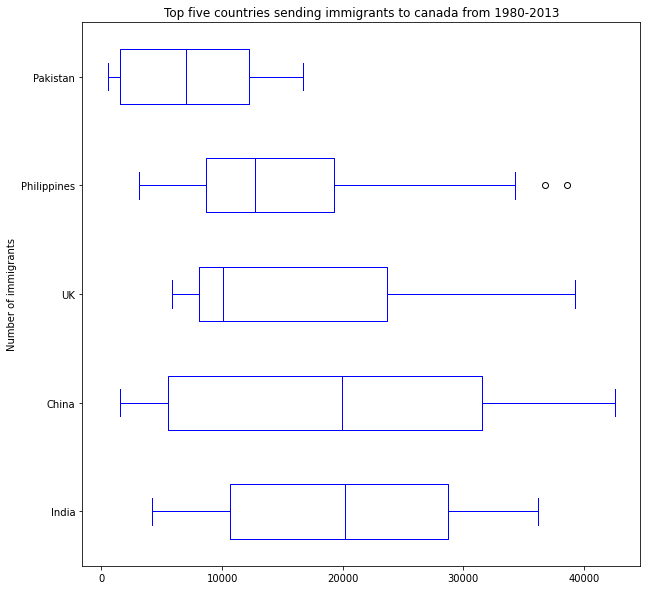

In [ ]:
df_can.sort_values(by='Total', axis='index', inplace=True, ascending=False)

dftop5 = df_can.head(5)

dftop5 = dftop5[years]

dftop5 = dftop5.transpose()

dftop5.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

dftop5.plot(
    kind='box',
    figsize=(10,10),
    color='blue',
    vert=False
)

plt.title("Top five countries sending immigrants to canada from 1980-2013")
plt.ylabel('Number of immigrants')
plt.show()

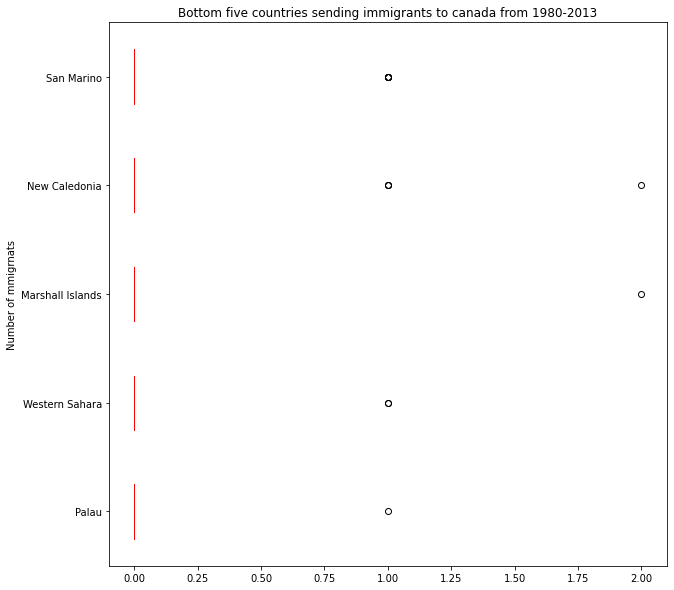

In [ ]:
df_can.sort_values(by='Total', axis='index', inplace=True, ascending=True)

dfbottom5 = df_can.head(5)

dfbottom5 = dfbottom5[years]

dfbottom5 = dfbottom5.transpose()

dfbottom5.plot(
    kind='box',
    figsize=(10,10),
    color='#FF0000',
    vert=False
)

plt.title("Bottom five countries sending immigrants to canada from 1980-2013")
plt.ylabel('Number of mmigrnats')
plt.show()


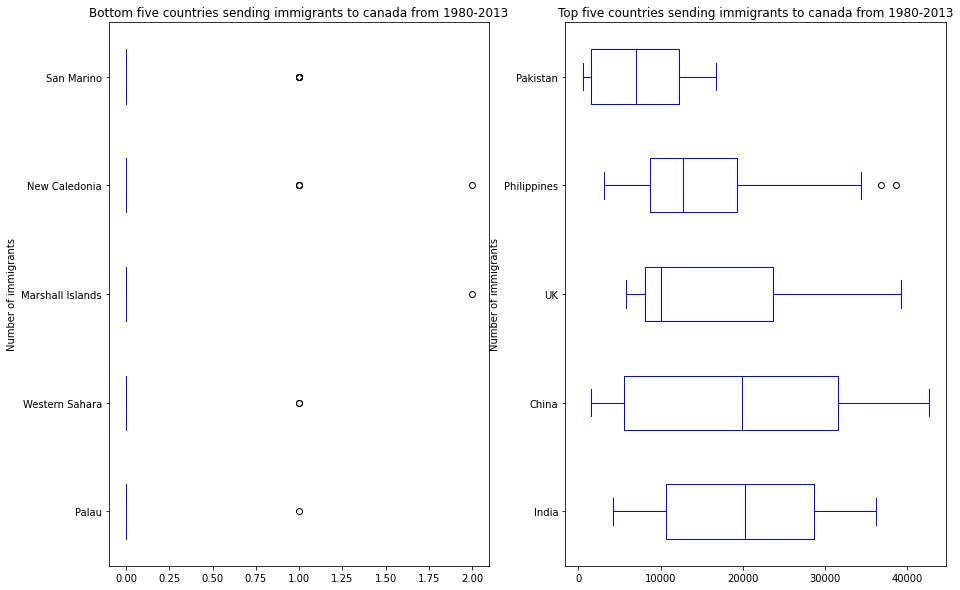

In [ ]:
# using subplots

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)



dfbottom5.plot(kind='box',figsize=(1,10),color='blue',vert=False, ax=ax1) 
ax1.set_title("Bottom five countries sending immigrants to canada from 1980-2013")
ax1.set_ylabel('Number of immigrants')


dftop5.plot(kind='box',figsize=(15,10),color='blue',vert=False, ax=ax2)
ax2.set_title("Top five countries sending immigrants to canada from 1980-2013")
ax2.set_ylabel('Number of immigrants')

plt.show()

### Create 4 subplots - to display boxplot of top 5 countries in Europe, Asis, Africa and Oceania

In [ ]:
df_europe = df_can.loc['Europe',years].transpose()


KeyError: ignored

In [ ]:
df_europe.sort_values(by='years', axis='index', inplace=True, ascending=False)


NameError: ignored

In [ ]:
df_europe.shape

NameError: ignored

### SCATTER PLOT

In [ ]:
dfscat = df_can[years].sum(axis=0)

dfscat

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

In [ ]:
dfscat = pd.DataFrame(dfscat)


dfscat.reset_index(inplace=True)



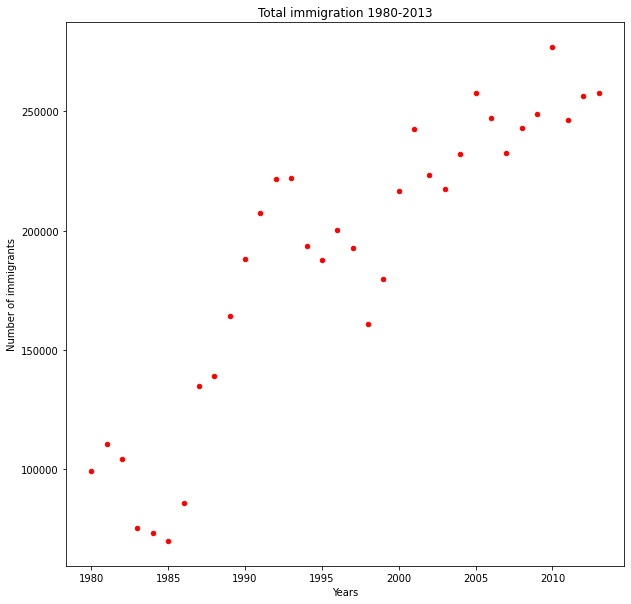

In [ ]:
dfscat.columns=['Year','Total']

dfscat.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Total',
    color='#FF0000'
)
plt.title('Total immigration 1980-2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

In [ ]:
x=dfscat['Year']
y=dfscat['Total']

fit=np.polyfit(x,y,1)

In [ ]:
fit

array([ 5.56709228e+03, -1.09261952e+07])

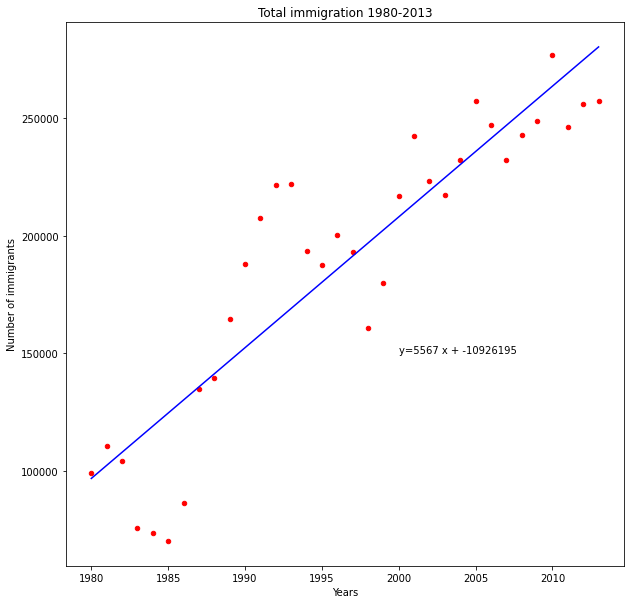

In [ ]:
dfscat.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Total',
    color='#FF0000'
)
plt.title('Total immigration 1980-2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

plt.plot(x,fit[0]*x+fit[1],color='#0000FF')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=[2000, 150000])

plt.show()


### BUBBLE PLOTS

In [ ]:
# Bubble Plots

dfnew = df_can[years].transpose()

dfnew.head()

Country,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,Kiribati,Andorra,Nauru,Canada,Monaco,Maldives,Liechtenstein,Equatorial Guinea,Papua New Guinea,Samoa,Guinea-Bissau,Montenegro,Lesotho,Tonga,Qatar,Mozambique,Swaziland,Comoros,Cabo Verde,Luxembourg,Oman,"China, Macao Special Administrative Region",Malawi,Turkmenistan,Namibia,Democratic People's Republic of Korea,Botswana,Bahrain,Tajikistan,Slovenia,Central African Republic,...,Syrian Arab Republic,Turkey,Peru,Ethiopia,Jordan,Nigeria,South Africa,Somalia,Trinidad and Tobago,Ukraine,El Salvador,Afghanistan,Mexico,Russian Federation,Germany,Bangladesh,Israel,Algeria,Iraq,Colombia,Morocco,Egypt,Portugal,Guyana,Haiti,Romania,Viet Nam,Jamaica,France,Lebanon,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
1980,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,3,0,0,1,2,0,0,4,0,1,14,0,0,5,0,0,1,10,0,0,0,4,...,315,481,317,98,177,81,1026,7,958,0,110,16,409,0,1626,83,1403,80,262,266,325,612,4473,2334,1666,375,1191,3198,1729,1409,863,1011,185,1172,9378,978,6051,22045,5123,8880
1981,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4,0,2,7,0,0,1,4,0,0,1,2,1,4,0,0,4,0,5,1,1,2,0,0,3,...,419,874,456,59,160,60,1118,10,947,0,295,39,394,0,1977,84,1711,67,245,326,471,660,3486,2943,3692,438,1829,2634,2027,1119,2930,1456,371,1429,10030,972,5921,24796,6682,8670
1982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,4,0,0,1,7,0,7,1,2,2,2,0,0,6,0,5,3,3,1,0,0,1,...,409,706,401,54,155,58,781,7,972,0,882,39,491,0,3062,86,1334,71,260,360,447,755,2432,3575,3498,583,2162,2661,2219,1159,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
1983,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4,1,0,0,2,1,0,2,0,0,0,5,8,0,3,0,3,1,3,1,0,0,0,...,269,280,241,98,113,58,379,12,766,0,2587,47,490,0,2376,81,541,69,380,244,335,455,1433,2650,2860,543,3404,2455,1490,789,4546,1081,197,1592,7100,900,4562,10015,1863,7338
1984,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,0,7,2,0,3,10,0,11,1,0,0,2,0,2,4,7,1,0,0,0,...,264,338,306,154,102,78,271,14,606,0,2666,71,509,0,1610,98,446,63,428,235,248,447,1398,1932,1418,524,7583,2508,1169,1253,3588,847,1086,1977,6661,668,3801,10170,1527,5704


In [ ]:
dfnew.reset_index(inplace=True)

dfnew.rename(columns={'index':'year'}, inplace=True)

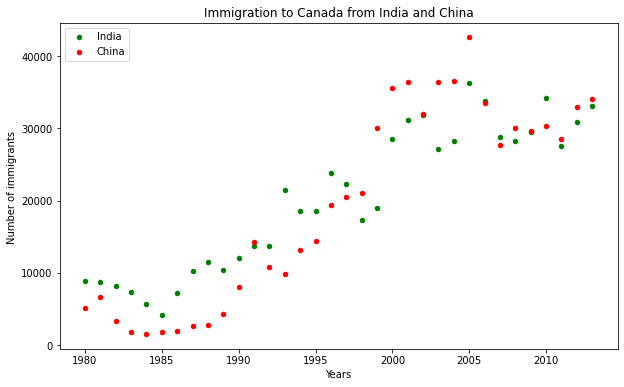

In [ ]:
#bubble plots

ax0=dfnew.plot(
    kind='scatter',
    x='year',
    y='India',
    figsize=(10,6),
    color='green'
)

ax1=dfnew.plot(
    kind='scatter',
    x='year',
    y='China',
    figsize=(10,6),
    color='#FF0000',
    ax=ax0
)

ax0.set_title('Immigration to Canada from India and China')
ax0.set_ylabel('Number of immigrants ')
ax0.set_xlabel('Years')
ax0.legend(['India','China'], loc='upper left')

plt.show()

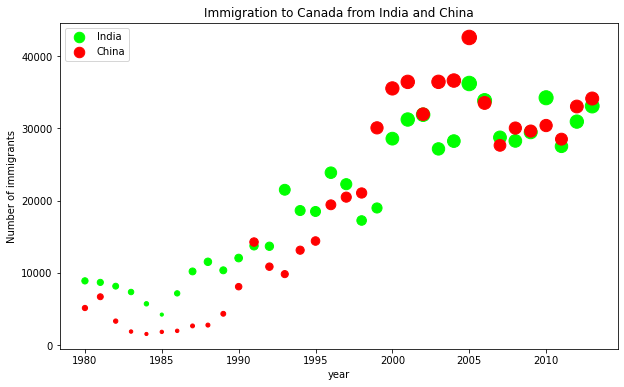

In [ ]:
#normalize
# x' = (X - Xmin)/(Xmax - Xmin)

norm_india = (dfnew['India'] - dfnew['India'].min()) / (dfnew['India'].max() - dfnew['India'].min())

norm_china = (dfnew['China'] - dfnew['China'].min()) / (dfnew['China'].max() - dfnew['China'].min())


#scatter plot

ax0 = dfnew.plot(
    kind='scatter',
    x='year',
    y='India',
    figsize=(10,6),
    color='#00FF00',
    s = norm_india*200+10
)

ax1 = dfnew.plot(
    x='year',
    kind='scatter',
    y='China',
    color='#FF0000',
    ax=ax0,
    s=norm_china*200+10
)

ax0.set_title("Immigration to Canada from India and China")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['India', 'China'], loc='upper left')
plt.show();

### Plot scatter and bubble plots for Brazil and Argentina

In [ ]:
dfnew2 = df_can[years].transpose()

dfnew2.head()

Country,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,Kiribati,Andorra,Nauru,Canada,Monaco,Maldives,Liechtenstein,Equatorial Guinea,Papua New Guinea,Samoa,Guinea-Bissau,Montenegro,Lesotho,Tonga,Qatar,Mozambique,Swaziland,Comoros,Cabo Verde,Luxembourg,Oman,"China, Macao Special Administrative Region",Malawi,Turkmenistan,Namibia,Democratic People's Republic of Korea,Botswana,Bahrain,Tajikistan,Slovenia,Central African Republic,...,Syrian Arab Republic,Turkey,Peru,Ethiopia,Jordan,Nigeria,South Africa,Somalia,Trinidad and Tobago,Ukraine,El Salvador,Afghanistan,Mexico,Russian Federation,Germany,Bangladesh,Israel,Algeria,Iraq,Colombia,Morocco,Egypt,Portugal,Guyana,Haiti,Romania,Viet Nam,Jamaica,France,Lebanon,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
1980,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,3,0,0,1,2,0,0,4,0,1,14,0,0,5,0,0,1,10,0,0,0,4,...,315,481,317,98,177,81,1026,7,958,0,110,16,409,0,1626,83,1403,80,262,266,325,612,4473,2334,1666,375,1191,3198,1729,1409,863,1011,185,1172,9378,978,6051,22045,5123,8880
1981,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4,0,2,7,0,0,1,4,0,0,1,2,1,4,0,0,4,0,5,1,1,2,0,0,3,...,419,874,456,59,160,60,1118,10,947,0,295,39,394,0,1977,84,1711,67,245,326,471,660,3486,2943,3692,438,1829,2634,2027,1119,2930,1456,371,1429,10030,972,5921,24796,6682,8670
1982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,4,0,0,1,7,0,7,1,2,2,2,0,0,6,0,5,3,3,1,0,0,1,...,409,706,401,54,155,58,781,7,972,0,882,39,491,0,3062,86,1334,71,260,360,447,755,2432,3575,3498,583,2162,2661,2219,1159,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
1983,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4,1,0,0,2,1,0,2,0,0,0,5,8,0,3,0,3,1,3,1,0,0,0,...,269,280,241,98,113,58,379,12,766,0,2587,47,490,0,2376,81,541,69,380,244,335,455,1433,2650,2860,543,3404,2455,1490,789,4546,1081,197,1592,7100,900,4562,10015,1863,7338
1984,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,0,7,2,0,3,10,0,11,1,0,0,2,0,2,4,7,1,0,0,0,...,264,338,306,154,102,78,271,14,606,0,2666,71,509,0,1610,98,446,63,428,235,248,447,1398,1932,1418,524,7583,2508,1169,1253,3588,847,1086,1977,6661,668,3801,10170,1527,5704


In [ ]:
dfnew2.reset_index(inplace=True)

dfnew2.rename(columns={'index':'year'}, inplace=True)

In [ ]:
dfnew2

Country,year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,Kiribati,Andorra,Nauru,Canada,Monaco,Maldives,Liechtenstein,Equatorial Guinea,Papua New Guinea,Samoa,Guinea-Bissau,Montenegro,Lesotho,Tonga,Qatar,Mozambique,Swaziland,Comoros,Cabo Verde,Luxembourg,Oman,"China, Macao Special Administrative Region",Malawi,Turkmenistan,Namibia,Democratic People's Republic of Korea,Botswana,Bahrain,Tajikistan,Slovenia,...,Syrian Arab Republic,Turkey,Peru,Ethiopia,Jordan,Nigeria,South Africa,Somalia,Trinidad and Tobago,Ukraine,El Salvador,Afghanistan,Mexico,Russian Federation,Germany,Bangladesh,Israel,Algeria,Iraq,Colombia,Morocco,Egypt,Portugal,Guyana,Haiti,Romania,Viet Nam,Jamaica,France,Lebanon,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,3,0,0,1,2,0,0,4,0,1,14,0,0,5,0,0,1,10,0,0,0,...,315,481,317,98,177,81,1026,7,958,0,110,16,409,0,1626,83,1403,80,262,266,325,612,4473,2334,1666,375,1191,3198,1729,1409,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4,0,2,7,0,0,1,4,0,0,1,2,1,4,0,0,4,0,5,1,1,2,0,0,...,419,874,456,59,160,60,1118,10,947,0,295,39,394,0,1977,84,1711,67,245,326,471,660,3486,2943,3692,438,1829,2634,2027,1119,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,4,0,0,1,7,0,7,1,2,2,2,0,0,6,0,5,3,3,1,0,0,...,409,706,401,54,155,58,781,7,972,0,882,39,491,0,3062,86,1334,71,260,360,447,755,2432,3575,3498,583,2162,2661,2219,1159,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4,1,0,0,2,1,0,2,0,0,0,5,8,0,3,0,3,1,3,1,0,0,...,269,280,241,98,113,58,379,12,766,0,2587,47,490,0,2376,81,541,69,380,244,335,455,1433,2650,2860,543,3404,2455,1490,789,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,0,7,2,0,3,10,0,11,1,0,0,2,0,2,4,7,1,0,0,...,264,338,306,154,102,78,271,14,606,0,2666,71,509,0,1610,98,446,63,428,235,248,447,1398,1932,1418,524,7583,2508,1169,1253,3588,847,1086,1977,6661,668,3801,10170,1527,5704
5,1985,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,2,0,0,0,5,5,0,1,7,2,1,3,0,0,0,0,1,3,4,3,0,0,...,385,202,328,157,179,78,310,10,699,0,2769,340,425,0,1441,92,680,44,231,214,328,348,1451,2299,1321,604,5907,2938,1177,1683,2819,962,845,1648,6543,514,3150,9564,1816,4211
6,1986,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,1,1,3,0,0,3,7,1,3,1,1,9,6,0,0,4,0,1,0,2,0,0,0,...,493,257,628,302,181,114,718,37,955,0,3106,496,667,0,1233,486,1212,69,265,257,388,514,2617,3942,1753,656,2741,4649,1298,2576,4808,1208,1838,1794,7074,691,4166,9470,1960,7150
7,1987,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,2,0,3,2,3,0,7,0,4,0,3,2,0,0,...,927,397,843,555,392,149,1470,190,1676,0,3558,741,813,0,1704,503,1497,132,384,376,505,1017,7684,6174,2132,1202,1406,5415,1658,3803,6931,2338,4447,2989,7705,1072,7360,21337,2643,10189
8,1988,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,3,1,3,0,6,4,1,5,7,2,1,4,0,0,1,0,3,0,8,10,0,0,...,864,346,1237,690,489,122,1305,217,2218,0,2720,828,916,0,1482,476,1389,242,619,352,685,1085,6888,2977,1829,1106,1411,3924,2038,3970,9211,2805,2779,3273,6469,1334,8639,27359,2758,11522
9,1989,0,0,0,0,0,1,0,0,0,2,0,0,0,1,0,1,0,0,1,4,0,5,9,0,5,3,2,7,8,1,0,4,0,2,0,8,9,0,0,...,1454,488,1667,1096,785,195,1301,401,3054,0,2955,1076,1017,0,1706,387,1762,434,911,439,1060,1663,8570,3270,2377,1582,3004,3946,2332,7157,16025,2979,2758,3781,6790,2261,11865,23795,4323,10343


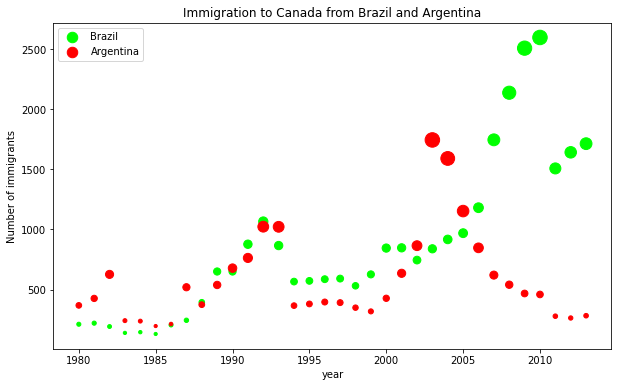

In [ ]:
#normalize
# x' = (X - Xmin)/(Xmax - Xmin)

norm_brazil = (dfnew2['Brazil'] - dfnew2['Brazil'].min()) / (dfnew2['Brazil'].max() - dfnew2['Brazil'].min())

norm_argentina = (dfnew2['Argentina'] - dfnew2['Argentina'].min()) / (dfnew2['Argentina'].max() - dfnew2['Argentina'].min())


#scatter plot

ax0 = dfnew2.plot(
    kind='scatter',
    x='year',
    y='Brazil',
    figsize=(10,6),
    color='#00FF00',
    s = norm_brazil*200+10
)

ax1 = dfnew2.plot(
    x='year',
    kind='scatter',
    y='Argentina',
    color='#FF0000',
    ax=ax0,
    s=norm_argentina*200+10
)

ax0.set_title("Immigration to Canada from Brazil and Argentina")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['Brazil', 'Argentina'], loc='upper left')
plt.show();

In [ ]:
# find out liers in data
# larger than Q3 (75%) by 1.5IQR
# smaller than Q1 (25%) by 1.5IQR
Q1 = 0
Q3 = 251.5
IQR = Q3 - Q1

Outlier1 = 251.5 + 1.5*(251.5)
Outlier2 = Q1 - 1.5*IQR

df_can[(df_can[1980] > Outlier1) | (df_can[1980] < Outlier2)]

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Greece,Europe,Southern Europe,Developed regions,1065,953,897,633,580,584,547,765,564,773,538,592,492,445,275,220,221,190,141,149,150,135,107,117,120,100,74,110,107,119,101,102,146,298,12410
United Republic of Tanzania,Africa,Eastern Africa,Developing regions,635,832,621,474,473,460,403,538,532,662,739,577,398,407,286,313,264,211,138,157,200,301,298,320,310,274,291,195,230,136,200,215,224,182,12496
Switzerland,Europe,Western Europe,Developed regions,806,811,634,370,326,314,294,565,508,523,505,602,666,728,475,687,823,666,510,536,471,383,276,346,337,270,258,308,357,328,285,266,243,201,15678
Ireland,Europe,Northern Europe,Developed regions,781,895,707,298,327,287,481,1078,1415,1378,845,705,533,436,331,231,276,220,170,162,178,190,178,192,244,224,283,300,412,395,547,525,725,1015,16964
Fiji,Oceania,Melanesia,Developing regions,632,705,814,554,389,446,361,523,561,736,1172,1619,1782,1317,1016,674,621,448,388,360,458,643,611,561,495,298,277,304,321,311,398,316,270,228,20609
Chile,Latin America and the Caribbean,South America,Developing regions,1233,1069,1078,781,681,533,633,1454,990,1023,1286,1749,1175,697,352,273,244,325,376,397,366,369,401,347,383,384,427,530,350,375,340,174,291,273,21359
Italy,Europe,Southern Europe,Developed regions,1820,2057,1480,820,858,667,731,1101,885,1068,895,711,623,663,558,508,476,491,399,410,383,410,374,321,334,344,325,320,370,429,434,374,440,545,22624
Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,356,467,410,553,620,640,734,886,702,668,699,623,479,523,599,799,747,876,930,909,875,1033,1018,1018,933,851,982,1121,23829
Malaysia,Asia,South-Eastern Asia,Developing regions,786,816,813,448,384,374,425,817,2072,2346,1917,1338,1486,1000,727,490,382,319,214,299,360,460,480,419,401,593,580,600,658,640,802,409,358,204,24417


### Waffle Charts


In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [ ]:
dfindopakchina = df_can.loc[['India', 'Pakistan', 'China'], :]

dfindopakchina

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [ ]:
df_dsn = df_can.loc[['Denmark', 'Sweden', 'Norway'], :]

categories = df_dsn.index.values

value = df_dsn['Total']

#create a waffle chart

width=40
height=10

colormap = plt.cm.coolwarm

Total number of tiles is 400
Denmark: 129
Sweden: 194
Norway: 77


<Figure size 432x288 with 0 Axes>

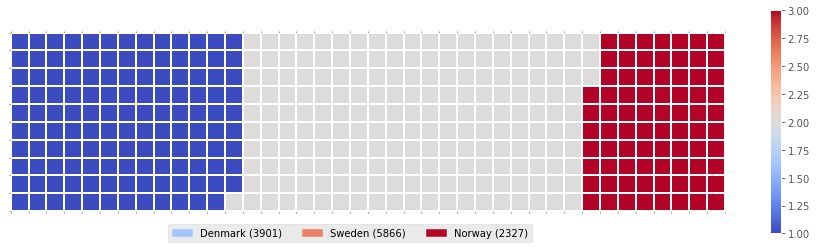

In [ ]:
create_waffle_chart(categories, value, height, width, colormap)

### Word Cloud

In [ ]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

/bin/bash: conda: command not found
Wordcloud is installed and imported!
File downloaded and saved!


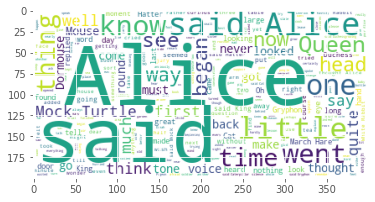

In [ ]:
#step 1 - preprocessing

stopwordsrem = set(STOPWORDS)

# step 2 - word cloud

alicewc = WordCloud(
    background_color = 'white',
    max_words=2000,
    stopwords=stopwordsrem
)

# step 3 - use the object to call function

alicewc.generate(alice_novel)

# step 4 - display

plt.imshow(alicewc)
plt.show()



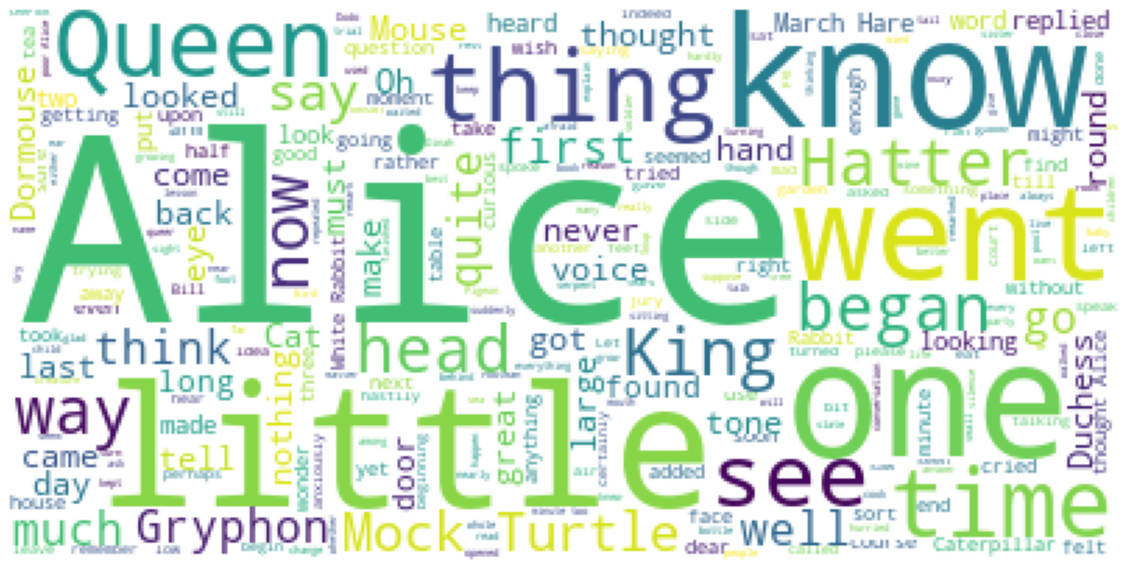

In [ ]:
#step1 - preprocessing

stopwordsrem = set(STOPWORDS)
stopwordsrem.add('said')


#step 2-wordcloud object

alicewc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stopwordsrem
)


#step3 - use the object to call function

alicewc.generate(alice_novel)

# step 4 - display
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
plt.imshow(alicewc)
plt.axis('off')
plt.show()

### Maps

In [ ]:
import numpy as np

import pandas as pd

import folium

In [ ]:
map1 = folium.Map()
map1

In [ ]:
map2 = folium.Map(location=[37.22,-122.16], zoom_start=12)
map2

In [ ]:
map3 = folium.Map(location=[56.130,-106.35], zoom_start=10, tiles='Stamen Toner')
map3

In [ ]:
map4 = folium.Map(location=[56.130, -106.35], zoom_start=5, tiles='Stamen Terrain')
map4

In [ ]:
map5 = folium.Map(tiles='Mapbox Bright')
map5

In [ ]:
map6 = folium.Map(location=[19.0760, 72.8777], zoom_start=12)
map6

In [ ]:
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
 
print('Dataset downloaded and read into a pandas dataframe!')
 
df_incidents.head()
 
df_incidents.shape

Dataset downloaded and read into a pandas dataframe!


(150500, 13)

In [ ]:
df_incidents.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


### MArkers with MAp

In [ ]:
#step1 - obtain dataset
df1 = df_incidents.iloc[0:100,:]

#step 2 - map
lat = 37.77
long = -122.42

map1 = folium.Map(location=[lat, long], zoom_start=12)


for lat, long, labels in zip(df1.Y, df1.X, df1.Category):
  folium.CircleMarker(
      [lat, long],
      radius=5,
      color='yellow',
      fill=True,
      popup=labels,
      fill_color='blue',
      fill_opacity=0.6
  ).add_to(map1)

map1

Adding a cluster

In [ ]:
#step1 - obtain dataset
df1 = df_incidents.iloc[0:100,:]

#step 2 - map
lat = 37.77
longs = -122.42

map1 = folium.Map(location=[lat, longs], zoom_start=12)

#cluster
from folium import plugins
clust = plugins.MarkerCluster().add_to(map1)


for lat, longs, labels in zip(df1.Y, df1.X, df1.Category):
  folium.CircleMarker(
      [lat, longs],
      radius=5,
      color='yellow',
      fill=True,
      popup=labels,
      fill_color='blue',
      fill_opacity=0.6
  ).add_to(clust)

map1

# Chloropleth Map

In [ ]:
df_can.reset_index(inplace=True)

,Country,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
2,Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2
3,New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,5
4,San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
191,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
192,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
193,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [ ]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [ ]:
worldmap = folium.Map(location=[0,0], zoom_start=2, tiles='Stamen Watercolor')
worldmap

world_geo = r'world_countries.json'

worldmap.choropleth(
    geo_data = world_geo,
    data=df_can,
    columns=['Country','Total'],
    key_on='feature.properties.name',
    legend='Immigration to Canada',
    fill_color='YlOrRd'
 )

worldmap

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
worldmap = folium.Map(location=[0,0], zoom_start=2, tiles='Stamen Watercolor')
worldmap

world_geo = r'world_countries.json'

scale = np.linspace(df_can['Total'].min(),df_can['Total'].max(), 6, dtype=int)
scale = scale.tolist()
scale[-1] = scale[-1]+1

worldmap.choropleth(
    geo_data = world_geo,
    data=df_can,
    columns=['Country','Total'],
    key_on='feature.properties.name',
    legend='Immigration to Canada',
    fill_color='YlOrRd',
    threshold_scale = scale
 )

worldmap

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
